In [16]:
import seaborn as sns
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from const import *

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
train_paths, test_paths = split_data_paths(path=DEFOG_PATH, split_ratio=0.8)

In [3]:
train_set = read_data(csv_names=train_paths, path=DEFOG_PATH)
test_set = read_data(csv_names=test_paths, path=DEFOG_PATH)

In [4]:
# Percent of records marked as StartHesitation / Walking / Turn
train_set[y_columns].sum() / len(train_set)

StartHesitation    0.000031
Walking            0.005183
Turn               0.046390
dtype: float64

In [11]:
# Number of patients with each symptom marked
for column in y_columns:
    print(f"{train_set.loc[train_set[column] == 1]['patient_id'].nunique()} patients had problems with {column}")

5 patients had problems with StartHesitation
39 patients had problems with Walking
73 patients had problems with Turn


Text(13.319444444444452, 0.5, 'Frequency')

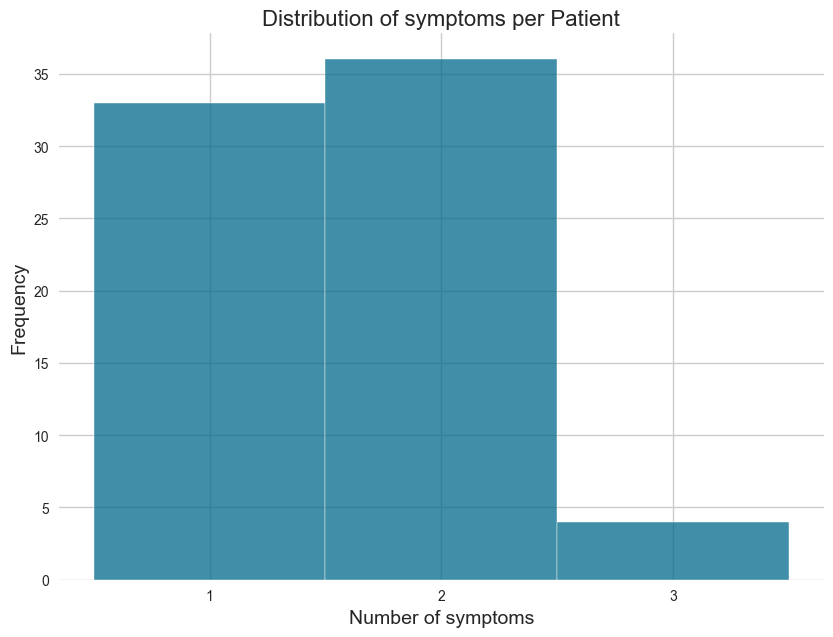

In [72]:
# Number of patients with more then one symptom
tmp_plot_data = (train_set.groupby("patient_id")[y_columns].nunique().sum(axis=1)-3).astype(str)
g = sns.displot(data=tmp_plot_data, kind='hist', height=6, aspect=1.4, bins=3, color="#00688B")
plt.title('Distribution of symptoms per Patient', fontsize=16)
plt.xlabel('Number of symptoms', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

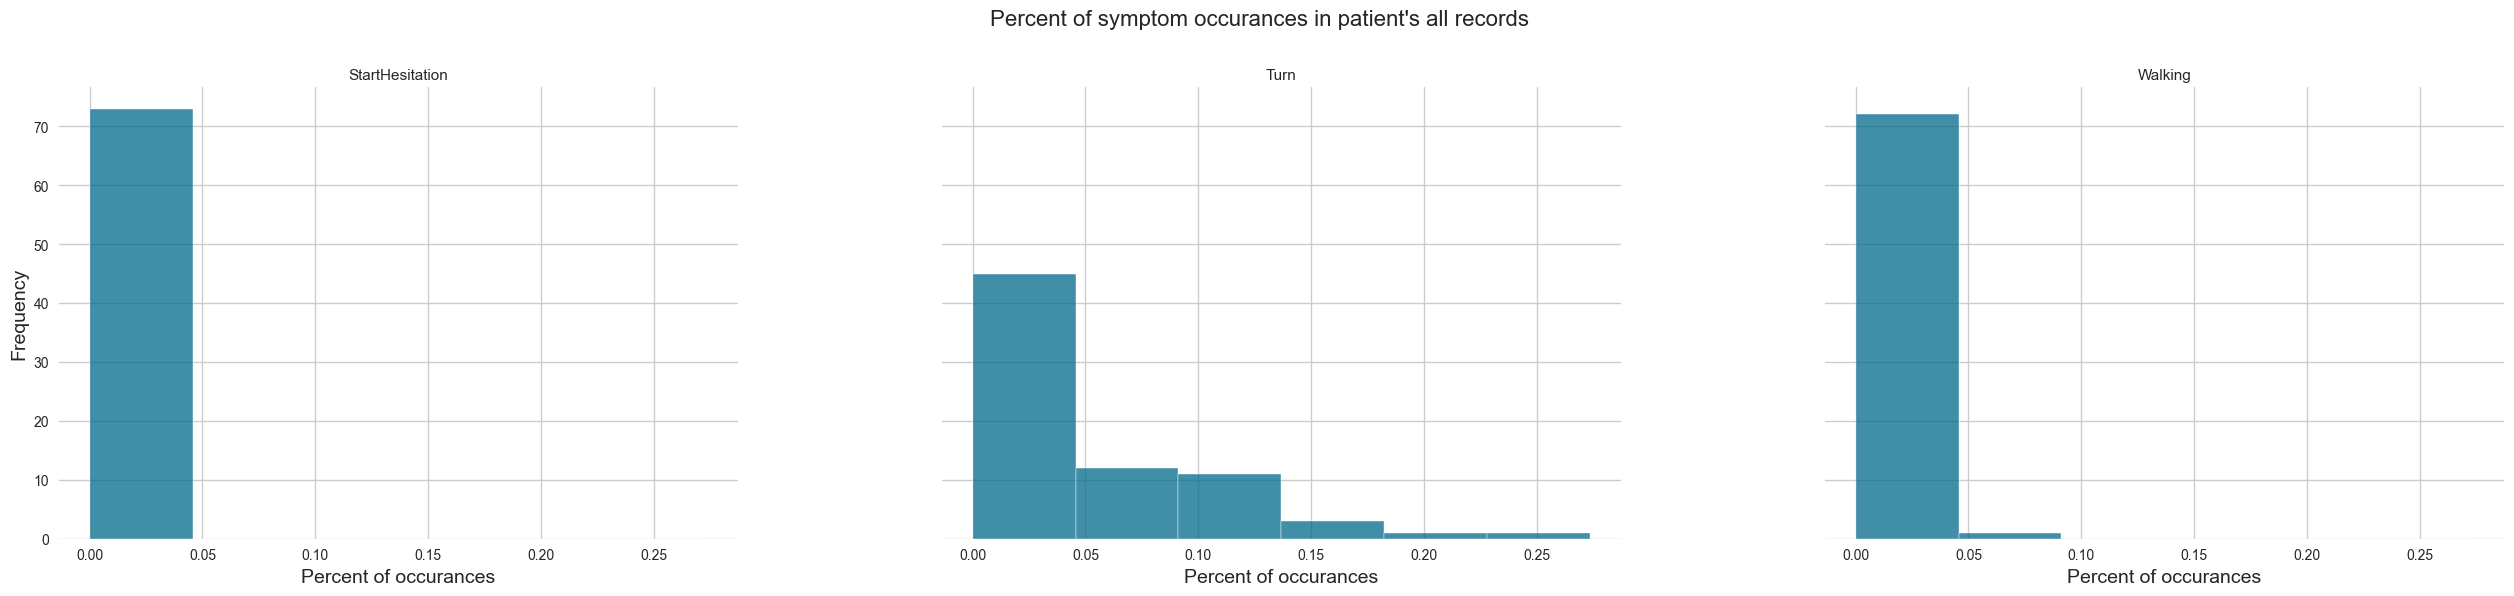

In [79]:
# Distribution plot of percenatage of symptom occurances in each patients records
tmp_plot_data = train_set[y_columns + ["patient_id"]].groupby("patient_id").mean().melt()
tmp_plot_data["variable"]=pd.Categorical(tmp_plot_data["variable"])
g=sns.displot(data=tmp_plot_data, x="value", col="variable", height=6, aspect=1.4, bins=6, color='#00688B')
g.set_titles("{col_name}")
g.fig.suptitle("Percent of symptom occurances in patient's all records", fontsize=16)
g.set_xlabels("Percent of occurances", fontsize=14)
g.set_ylabels('Frequency', fontsize=14)
plt.subplots_adjust(top=0.85, wspace=0.3)

In [55]:
tmp_plot_data["variable"]=pd.Categorical(tmp_plot_data["variable"])

In [27]:
X_train_set[["Valid", "Task"]].sum() / len(X_train_set)

Valid    0.302964
Task     0.304776
dtype: float64

In [33]:
Y_train_set[["StartHesitation", "Turn", "Walking", 'Valid', 'Task']].groupby(["Valid", "Task"]).mean()

StartHesitation      Turn   Walking
Valid Task                                      
False False         0.000055  0.019191  0.002752
      True          0.000000  0.001161  0.000268
True  True          0.000027  0.107278  0.012308